In [1]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    model_name="deepseek-r1-distill-llama-70b",
    temperature=0
)
response=llm.invoke("what is length of wall of china?")

In [2]:
response.content

"<think>\nOkay, so I need to figure out the length of the Great Wall of China. I remember hearing that it's really long, but I'm not exactly sure how long. I think it's somewhere in the thousands of kilometers, but I'm not certain. Let me try to break this down.\n\nFirst, I know the Great Wall is a series of fortifications built across several Chinese dynasties. It wasn't built all at once, so maybe that's why the length can vary. I've heard different numbers before, like 13,000 miles or something like that. But I also remember reading somewhere that it's actually shorter than that. Maybe the longer number includes all the branches and sections that aren't part of the main wall.\n\nI should consider the different dynasties that contributed to the wall. The Qin Dynasty, I think, was the first to start building it, but it was during the Han Dynasty that it started to take shape more. Then the Sui and Ming Dynasties did a lot of work on it. The Ming Dynasty, especially, is famous for buil

### Our Custom Tools

In [3]:
from langchain.tools import tool

@tool
def multiple(a: int, b: int) -> int:
    """
    Multiple two integers.

    Args:
    a(int): The first integer
    b(int): The second integer

    Returns:
        int: The product of a and b
    """

    return a * b


@tool
def add(a: int, b: int) -> int:
    """
    Add two integers.

    Args:
    a(int): The first integer
    b(int): The second integer

    Returns:
        int: The Sum of a and b
    """

    return a + b


@tool
def divide(a: int, b: int) -> int:
    """
    Divide two integers.

    Args:
    a(int): The first integer
    b(int): The second integer

    Returns:
        int: The result of division
    """

    if b == 0:
        raise ValueError("Denominator cannot be zero.")
    return a / b

### Inbuilt Tool

In [4]:
from langchain_community.tools import DuckDuckGoSearchRun
search = DuckDuckGoSearchRun()

In [5]:
search.invoke("what is the latest update on iphone17 release?")

g:\AgenticAI\venv\Lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


'Latest Current News: U.S., World, Entertainment, Health, Business, Technology, Politics, Sports. View the latest news and breaking news today for U.S., world, weather, entertainment, politics and health at CNN.com. Go to NBCNews.com for breaking news, videos, and the latest top stories in world news, business, politics, health and pop culture. Read the latest headlines, breaking news, and videos at APNews.com, the definitive source for independent journalism from every corner of the globe. CBS Sports HQ: Local News, Weather & More Want more highlights and less talk? Get the latest news coverage for your favorite sports, players, and teams on CBS Sports HQ.'

### Binding all tools

In [6]:
tools = [multiple, add, divide, search]

In [7]:
llm_with_tools = llm.bind_tools(tools)

In [8]:
response=llm_with_tools.invoke("hi")
response

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'reasoning_content': 'Alright, the user sent "hi". I need to figure out how to respond. Since I\'m an assistant, I should greet them back and offer help. I don\'t see any specific request, so I\'ll keep it friendly and open-ended. Maybe ask how I can assist them today. That should cover it.\n'}, response_metadata={'token_usage': {'completion_tokens': 78, 'prompt_tokens': 367, 'total_tokens': 445, 'completion_time': 0.728821004, 'prompt_time': 0.033151349, 'queue_time': 0.2018065, 'total_time': 0.761972353}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_76307ac09b', 'finish_reason': 'stop', 'logprobs': None}, id='run--58f737d5-6aa2-4bb9-9ac6-9ad6363c6a92-0', usage_metadata={'input_tokens': 367, 'output_tokens': 78, 'total_tokens': 445})

In [9]:
response.tool_calls


[]

In [10]:
response=llm_with_tools.invoke("what is 2+2?")
response

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, so the user is asking, "what is 2+2?" That\'s a pretty straightforward math problem. I need to figure out how to respond using the tools provided.\n\nLooking at the tools available, there\'s an "add" function that takes two integers and returns their sum. That seems perfect for this query. I should use that function with a=2 and b=2.\n\nI need to make sure I format the tool call correctly. The function name should be "add" and the arguments should be a JSON object with a and b set to 2 each.\n\nSo, the tool call should look like {"name": "add", "arguments": {"a": 2, "b": 2}}. That should give the correct result of 4.\n', 'tool_calls': [{'id': 'tydp96pwc', 'function': {'arguments': '{"a":2,"b":2}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 190, 'prompt_tokens': 373, 'total_tokens': 563, 'completion_time': 0.765018913, 'prompt_time': 0.036866259, 'queue_time': 0.20239

In [11]:
response.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': 'tydp96pwc',
  'type': 'tool_call'}]

In [12]:
response=llm_with_tools.invoke("what is a current age of the TATA Group?")
response

AIMessage(content='The TATA Group was founded in 1868 by Jamsetji Tata. As of 2023, it is 155 years old. \n\n', additional_kwargs={'reasoning_content': "Okay, the user is asking about the current age of the TATA Group. I need to figure out how to respond to this. First, I should understand what the TATA Group is. From what I know, the TATA Group is a large conglomerate based in India, founded by Jamsetji Tata. \n\nI remember that Jamsetji Tata founded the group in the late 19th century. Specifically, I think it was around 1868 when he started the company. To find the current age, I need to subtract the founding year from the current year, which is 2023. \n\nSo, 2023 minus 1868 equals 155 years. That means the TATA Group is 155 years old as of 2023. \n\nI should make sure this information is accurate. Maybe I can cross-verify it with a quick search, but since I can't access external information, I'll rely on my existing knowledge. \n\nI think it's safe to say that the TATA Group is inde

In [13]:
response.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'TATA Group age 2023'},
  'id': '7rw0z5erq',
  'type': 'tool_call'}]

### Setting up Workflow

In [14]:
SYSTEM_PROMPT = "You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs."

In [15]:
user_query = ["tell me what is 2+2"]

In [16]:
[SYSTEM_PROMPT] + user_query

['You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs.',
 'tell me what is 2+2']

In [17]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState, StateGraph, END, START

In [18]:
workflow = StateGraph(MessagesState)

In [19]:
def function1(state: MessagesState):
    user_question = state["messages"]

    input_question = [SYSTEM_PROMPT] + user_question

    response = llm_with_tools.invoke(input_question)

    return {
        "messages": [response]
    }

In [20]:
workflow.add_node("llm_decision_step", function1)

In [21]:
tools

[StructuredTool(name='multiple', description='Multiple two integers.\n\nArgs:\na(int): The first integer\nb(int): The second integer\n\nReturns:\n    int: The product of a and b', args_schema=<class 'langchain_core.utils.pydantic.multiple'>, func=<function multiple at 0x0000016FDA3B34C0>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\na(int): The first integer\nb(int): The second integer\n\nReturns:\n    int: The Sum of a and b', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x0000016FDA3B39C0>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\na(int): The first integer\nb(int): The second integer\n\nReturns:\n    int: The result of division', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x0000016FDC767D80>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', max_results=5, backend='auto', source='text'))]

In [22]:
from langgraph.prebuilt import ToolNode

workflow.add_node("tools", ToolNode(tools))

In [23]:
workflow.add_edge(START,"llm_decision_step")

In [24]:
from langgraph.prebuilt import tools_condition

workflow.add_conditional_edges("llm_decision_step",
                            tools_condition)

In [25]:
workflow.add_edge("tools","llm_decision_step")

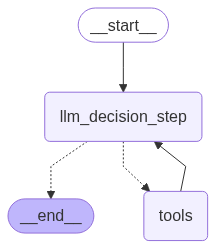

In [26]:
app = workflow.compile()
app

### Experimenting with workflow

In [29]:
message=[HumanMessage(content="What is 2 times of narendramodi's age?")]

In [30]:
app.invoke({"messages": message})

g:\AgenticAI\venv\Lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


{'messages': [HumanMessage(content="What is 2 times of narendramodi's age?", additional_kwargs={}, response_metadata={}, id='e3470021-fb11-4081-8781-0249d9f08d04'),
  AIMessage(content="To find 2 times Narendra Modi's age, I'll first look up his current age using DuckDuckGo.\n\n", additional_kwargs={'reasoning_content': 'Okay, so the user is asking, "What is 2 times of narendramodi\'s age?" First, I need to figure out what exactly they\'re asking for. It seems like they want to multiply Narendra Modi\'s age by 2. \n\nTo do this, I need to find out how old Narendra Modi is. I don\'t have that information stored, so I should use the DuckDuckGo search tool to look it up. \n\nI\'ll call the duckduckgo_search function with the query "Narendra Modi age" to get the most accurate and up-to-date information. Once I have his age, I can then use the multiple function to calculate 2 times his age.\n\nI should make sure to handle any potential issues, like if the search doesn\'t return a clear age 

In [ ]:
app.invoke({"messages" : ["What is 2 times of narendramodi's age?"]})

g:\AgenticAI\venv\Lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


{'messages': [HumanMessage(content="What is 2 times of narendramodi's age?", additional_kwargs={}, response_metadata={}, id='fff8bd46-1884-4137-a2f1-3e7102c614e6'),
  AIMessage(content="To find 2 times Narendra Modi's age, I'll first look up his current age using DuckDuckGo.\n\n", additional_kwargs={'reasoning_content': 'Okay, so the user is asking, "What is 2 times of narendramodi\'s age?" First, I need to figure out what exactly they\'re asking for. It seems like they want to multiply Narendra Modi\'s age by 2. \n\nTo do this, I need to find out how old Narendra Modi is. I don\'t have that information stored, so I should use the DuckDuckGo search tool to look it up. \n\nI\'ll call the duckduckgo_search function with the query "Narendra Modi age" to get the most accurate and up-to-date information. Once I have his age, I can then use the multiple function to calculate 2 times his age.\n\nI should make sure to handle any potential issues, like if the search doesn\'t return a clear age 

In [ ]:
message = [HumanMessage(content="What is the speed of light in m/s and multiply it by 10?")]

In [ ]:
response=app.invoke({"messages":message})

In [ ]:
response["messages"][-1].content

'The speed of light in meters per second is 299,792,458 m/s. When multiplied by 10, the result is 2,997,924,580 meters per second. \n\n**Step-by-Step Explanation:**\n\n1. **Identify the speed of light:** The exact speed of light in a vacuum is 299,792,458 meters per second.\n2. **Multiply by 10:** \n   \\[\n   299,792,458 \\, \\text{m/s} \\times 10 = 2,997,924,580 \\, \\text{m/s}\n   \\]\n3. **Present the result:** The speed of light multiplied by 10 is 2,997,924,580 meters per second.\n\n**Answer:** 2,997,924,580 meters per second.'

In [ ]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is the speed of light in m/s and multiply it by 10?
================================== Ai Message ==================================

The speed of light in meters per second is approximately 299,792,458 m/s. When multiplied by 10, the result is:
Tool Calls:
  multiple (c799v6z05)
 Call ID: c799v6z05
  Args:
    a: 299792458
    b: 10
================================= Tool Message =================================
Name: multiple

2997924580
================================== Ai Message ==================================

The speed of light is approximately **299,792,458 m/s**. Multiplying this by 10 gives:
Tool Calls:
  multiple (72k2f2520)
 Call ID: 72k2f2520
  Args:
    a: 299792458
    b: 10
================================= Tool Message =================================
Name: multiple

2997924580
================================== Ai Message ==================================

The speed of light i

## Workflow2: Custom tool using Yahoo Finance

In [31]:
import yfinance as yf

In [32]:
@tool
def get_stock_price(ticker: str)->str:
    """
    Fetches the previous closing price of a given stock ticker from Yahoo Finance.

    Args:
        ticker(str): The stock ticker symbol (e.g. 'AAPL', 'TSLA', 'NIFTY.BO')

    Returns:
        str: A message with stock's previous closing price
    """

    try:
        stock = yf.Ticker(ticker)
        price = stock.info.get('previousClose')
        if price is None:
            return f"Could not fetch price for ticker '{ticker}'."
        return f"The last closing price of {ticker.upper()} was ${price:.2f}."
    except Exception as e:
        return f"An error occurred while fetching stock data: {str(e)}"

In [33]:
get_stock_price.invoke('AAPL')

'The last closing price of AAPL was $210.16.'

In [34]:
get_stock_price.invoke("TSLA")

'The last closing price of TSLA was $321.67.'

In [35]:
tools

[StructuredTool(name='multiple', description='Multiple two integers.\n\nArgs:\na(int): The first integer\nb(int): The second integer\n\nReturns:\n    int: The product of a and b', args_schema=<class 'langchain_core.utils.pydantic.multiple'>, func=<function multiple at 0x0000016FDA3B34C0>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\na(int): The first integer\nb(int): The second integer\n\nReturns:\n    int: The Sum of a and b', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x0000016FDA3B39C0>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\na(int): The first integer\nb(int): The second integer\n\nReturns:\n    int: The result of division', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x0000016FDC767D80>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', max_results=5, backend='auto', source='text'))]

In [36]:
tools.append(get_stock_price)

In [37]:
tools

[StructuredTool(name='multiple', description='Multiple two integers.\n\nArgs:\na(int): The first integer\nb(int): The second integer\n\nReturns:\n    int: The product of a and b', args_schema=<class 'langchain_core.utils.pydantic.multiple'>, func=<function multiple at 0x0000016FDA3B34C0>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\na(int): The first integer\nb(int): The second integer\n\nReturns:\n    int: The Sum of a and b', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x0000016FDA3B39C0>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\na(int): The first integer\nb(int): The second integer\n\nReturns:\n    int: The result of division', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x0000016FDC767D80>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', max_results=5, backend='auto', source='text')),
 S

In [38]:
llm_with_tools = llm.bind_tools(tools)

In [39]:
response = llm_with_tools.invoke("can you give me a latest stock price of adani greens?")

In [40]:
response.content

''

In [41]:
response.tool_calls

[{'name': 'get_stock_price',
  'args': {'ticker': 'ADANIGREEN.NS'},
  'id': '8syr3t8ab',
  'type': 'tool_call'}]

In [42]:
SYSTEM_PROMPT = SystemMessage(
    content="You are a helpful assistant tasked with using search, the yahoo finance tool and performing arithmetic on a set of inputs."
)
def function_1(state:MessagesState):
    
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }

In [43]:
workflow = StateGraph(MessagesState)
workflow.add_node("llm_decision_step", function_1)
workflow.add_node("tools", ToolNode(tools))
workflow.add_edge(START, "llm_decision_step")
workflow.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)
workflow.add_edge("tools", "llm_decision_step")
react_graph2 = workflow.compile()

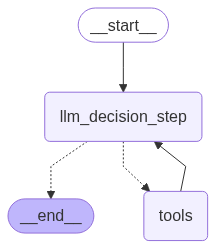

In [44]:
react_graph2

In [45]:
messages = [HumanMessage(content="add 1000 in the current stock price of Apple.")]
messages = react_graph2.invoke({"messages": messages})

BadRequestError: Error code: 400 - {'error': {'message': "Failed to call a function. Please adjust your prompt. See 'failed_generation' for more details.", 'type': 'invalid_request_error', 'code': 'tool_use_failed', 'failed_generation': '<tool_call>{"name":"add","arguments":{"a":1000,"b":210.16}}</tool_call>\n\nThe result of adding 1000 to the current stock price of Apple (210.16) is **1210.16**.'}}

In [ ]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

add 1000 in the current stock price of Apple.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (g81mzsh4w)
 Call ID: g81mzsh4w
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $210.16.
================================== Ai Message ==================================

The current stock price of Apple (AAPL) is **$210.16**. Adding 1000 to this price gives:

**$1,210.16**


In [47]:
messages = [HumanMessage(content="can you give me current stock price of Apple with the latest news of the Apple.")]
messages = react_graph2.invoke({"messages": messages})

GraphRecursionError: Recursion limit of 25 reached without hitting a stop condition. You can increase the limit by setting the `recursion_limit` config key.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/GRAPH_RECURSION_LIMIT

In [ ]:
for m in messages['messages']:
    m.pretty_print()